# Telecom Growth Explanatory Data Analysis - TellCo

##  Import Libraries and Functions

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
from dotenv import load_dotenv
from sqlalchemy import create_engine
os.chdir('..')
from Db_connection.connection import PostgresConnection
from src.utils import *



Connected to PostgreSQL database!
Connection closed.


## Connect To PostgreSQL Database

In [2]:
db = PostgresConnection(dbname='telecom', user='postgres', password='postgres')
db.connect()

query = "SELECT * FROM xdr_data"
result = db.execute_query(query)


df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head()) 
db.close_connection()

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

# Task 1 - User Overview Analysis

## Understanding and cleaning the data

In [3]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,None,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


checking for missing values

In [4]:
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

handling missing value

In [5]:

# Call the function and pass the df DataFrame
cleaned_df = handle_missing_values(df)
print(cleaned_df)    # For other Python environments


           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149995  1.304243e+19   4/29/2019 7:28     615.0   4/30/2019 0:01   407.0   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [6]:
cleaned_df.shape

(148935, 55)

In [7]:
cleaned_df.drop_duplicates(inplace=True)

In [8]:
cleaned_df.info

<bound method DataFrame.info of            Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149995  1.304243e+19   4/29/2019 7:28     615.0   4/30/2019 0:01   407.0   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   

        Dur. (ms)          IMSI  MSISDN/Number         

Write the cleaned DataFrame to the SQL table

In [9]:
db = PostgresConnection(dbname='telecom', user='postgres', password='postgres')
db.connect()

# Assuming data_cleaned is the cleaned DataFrame you want to write back
db.write_dataframe_to_db(cleaned_df, 'xdr_data_cleaned')

# Query the table to verify the write
query = "SELECT * FROM xdr_data_cleaned"
result = db.execute_query(query)

# Convert result to a DataFrame and display the information
df_cleaned = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df_cleaned.info())

# Close the connection
db.close_connection()

Connected to PostgreSQL database!
Data successfully written to table xdr_data_cleaned.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148935 entries, 0 to 148934
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 148935 non-null  float64
 1   Start                                     148935 non-null  object 
 2   Start ms                                  148935 non-null  float64
 3   End                                       148935 non-null  object 
 4   End ms                                    148935 non-null  float64
 5   Dur. (ms)                                 148935 non-null  float64
 6   IMSI                                      148935 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      148935 non-null  float64
 9   Last 

In [10]:
pd.options.display.float_format = '{:.0f}'.format
from scripts.User_overview_analysis.analysis import *
from scripts.visualization.visualize_user_overview import *


## top 10 handsets used by the customers

In [11]:
handset_counts = df_cleaned['Handset Type'].value_counts().sort_values(ascending = False)

handset_counts.head(10)

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: count, dtype: int64

## top 3 handset manufacturers

In [12]:
top_3_manufacturers = df_cleaned['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59464
Samsung    40579
Huawei     34366
Name: count, dtype: int64


##  top 5 handsets per top 3 handset manufacturer

In [13]:
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = df_cleaned[df_cleaned['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"\nTop 5 Handsets for Manufacturer {manufacturer}:")
    print(top_5_handsets)


Top 5 Handsets for Manufacturer Apple:
Handset Type
Apple iPhone 6S (A1688)    9413
Apple iPhone 6 (A1586)     9012
Apple iPhone 7 (A1778)     6304
Apple iPhone Se (A1723)    5176
Apple iPhone 8 (A1905)     4985
Name: count, dtype: int64

Top 5 Handsets for Manufacturer Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4480
Samsung Galaxy A5 Sm-A520F      3708
Samsung Galaxy J5 (Sm-J530)     3682
Samsung Galaxy J3 (Sm-J330)     3464
Samsung Galaxy S7 (Sm-G930X)    3176
Name: count, dtype: int64

Top 5 Handsets for Manufacturer Huawei:
Handset Type
Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2018
Huawei P20                         1479
Huawei Y6 2018                      997
Name: count, dtype: int64


## Aggregate User Behaviour

In [14]:
df_user_behavior = aggregate_user_behavior(df_cleaned)
display(df_user_behavior)

,MSISDN/Number,Bearer_Id,Duration,Total_DL,Total_UL,SM_DL,SM_UL,Google_DL,Google_UL,Email_DL,Email_UL,YouTube_DL,YouTube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL
0,33601001722,1,116720,842637466,36053108,2206504,25631,3337123,1051882,837400,493962,14900201,6724347,10265105,16915876,811091133,1367528,377096990,9473882
1,33601001754,1,181230,120755184,36104459,2598548,62017,4197697,1137166,2828821,478960,5324251,7107972,770569,10451194,105035298,14714780,279557701,2152370
2,33601002511,1,134969,556659663,39306820,3148004,47619,3343483,99643,2436500,768880,2137272,19196298,16525919,2827981,529068485,9759228,495086501,6607171
3,33601007832,1,49878,401993172,20327526,251469,28825,5937765,3740728,2178618,106052,4393123,2584198,1157362,784730,388074835,3051292,25248001,10031701
4,33601008617,2,18552,681565208,47140264,1430615,25656,6864334,2385474,1123904,528830,5169986,15596516,12485824,12115038,654490546,2908364,388821856,13580386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,33789996170,1,8810,687925212,26716429,234320,65863,6834178,697091,480946,525969,8294310,18353533,14754741,147797,657326717,3034642,291391283,3891534
106852,33789997247,1,140988,444575092,35732243,442214,56355,1472406,3957299,2513433,664,5596862,14254710,6929961,1601099,427620216,9383076,204636073,6479040
106853,3197020876596,1,877385,194828056,37295915,668596,46628,8572779,1865881,842279,678492,9839889,2120016,10340908,16251392,164563605,13485133,467678100,2848373
106854,337000037000919,1,253030,539634985,56652839,496337,25229,8215537,1615080,2989663,328919,16690728,20044212,9983678,20921364,501259042,8883653,144354057,4834382


## Basisc metrics

In [15]:
metrics = analyze_basic_metrics(df_user_behavior)
display(metrics)

,Bearer_Id,Duration,Total_DL,Total_UL,SM_DL,SM_UL,Google_DL,Google_UL,Email_DL,Email_UL,YouTube_DL,YouTube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL
count,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856,106856
mean,1,102695,455184477,41127097,1795947,32908,5750360,2055028,1792446,467059,11629307,11017120,11617520,10997794,422598897,8289507,421245976,8267681
std,1,72247,224790645,10386665,954210,17520,3043308,1095043,954200,248825,6182726,5849951,6194250,5854129,224620486,4408970,224157891,4392223
min,1,7142,8827082,2866892,12,0,207,3,97,14,53,106,42,35,2516,59,3290,156
25%,1,56410,276264920,34197060,1038284,19010,3346133,1185268,1036754,269604,6720295,6361144,6668676,6353316,243369920,4771741,243286828,4777439
50%,1,86400,456245462,41127015,1792984,32854,5740054,2054326,1792060,465892,11626465,11021903,11634538,10996365,423586168,8306379,421119218,8273797
75%,2,133912,633812078,48080206,2553164,46832,8181011,2923567,2551709,664105,16530491,15681806,16536794,15642394,601067887,11798529,599833498,11741376
max,18,1573420,902969616,78331311,3586007,65870,11462752,4121343,3586146,936418,23259098,22011962,23258336,22011955,843433310,16558794,843420874,16558816


## Visualize Basic Metrics

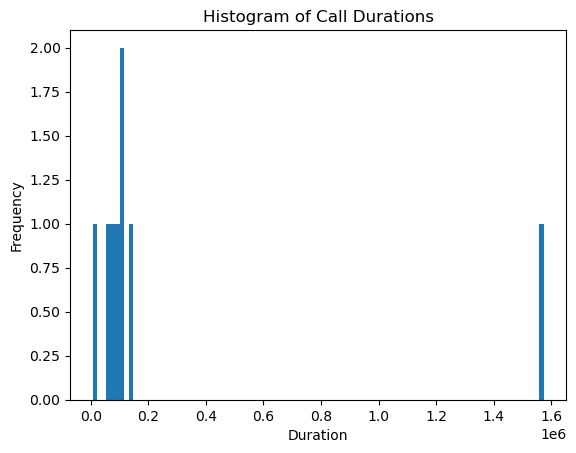

In [16]:
plot_duration_histogram(metrics, bins=100)

## Visualizing Applications

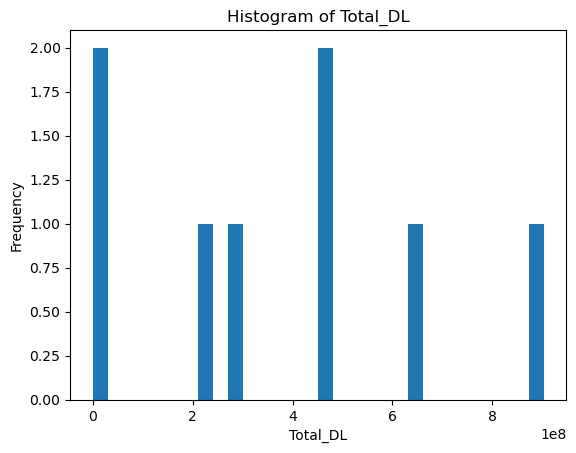

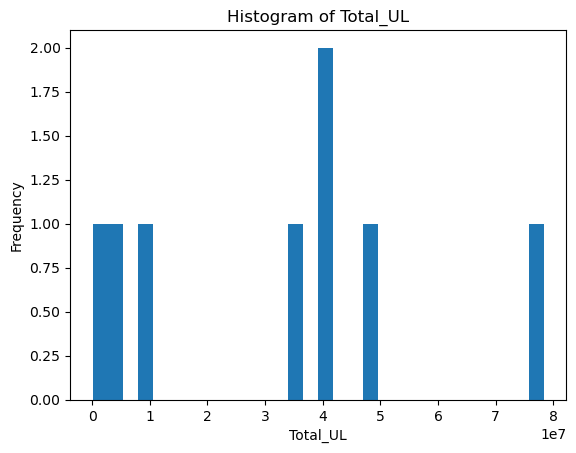

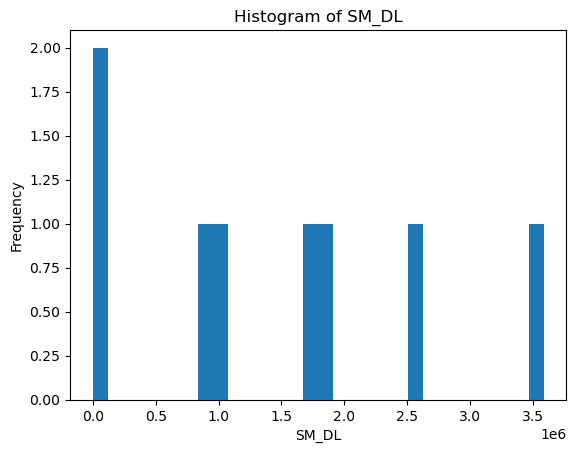

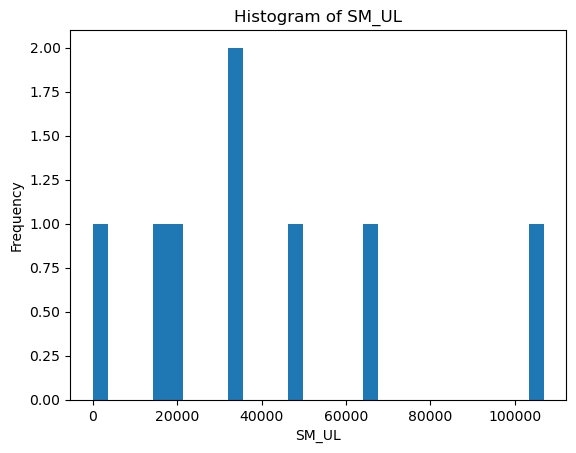

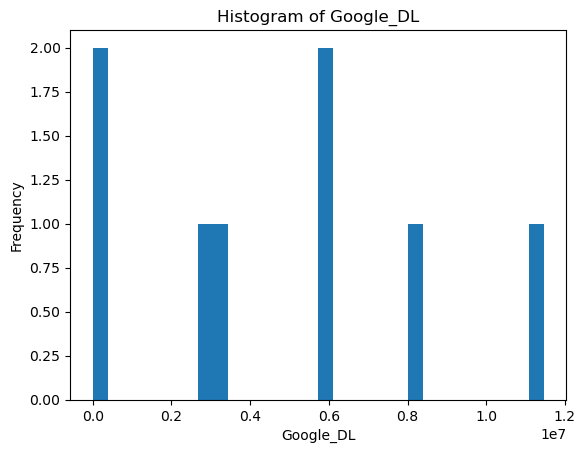

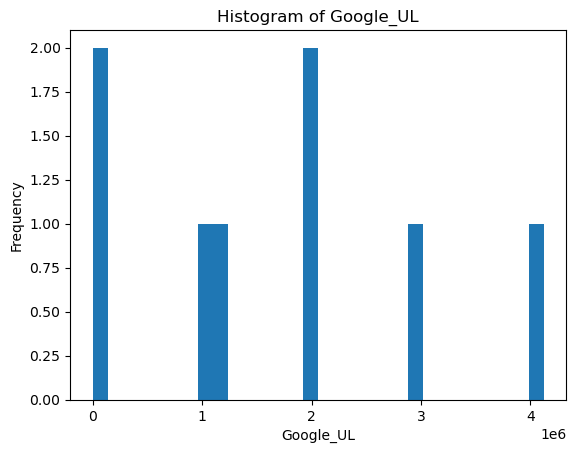

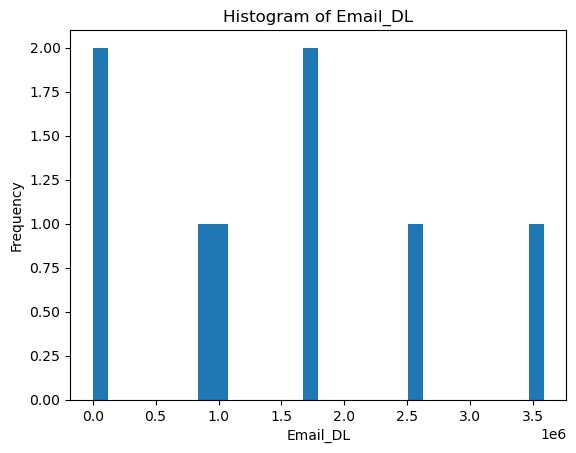

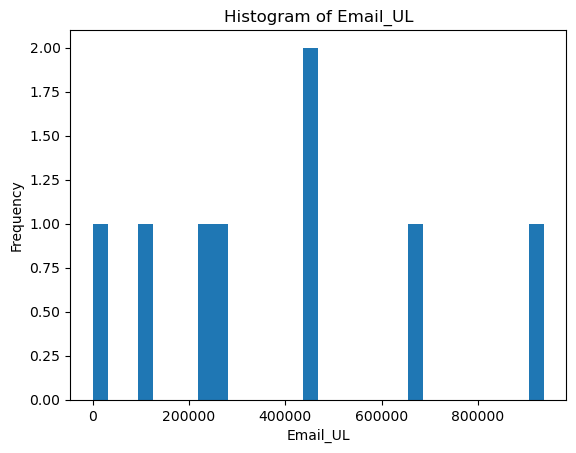

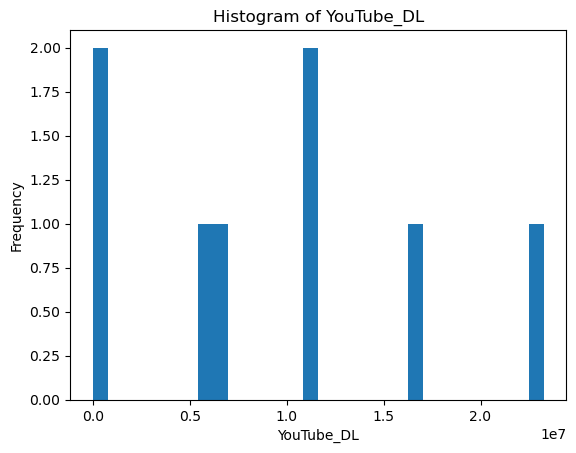

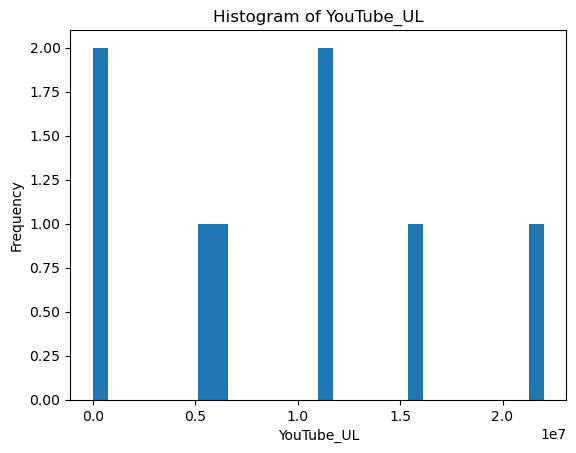

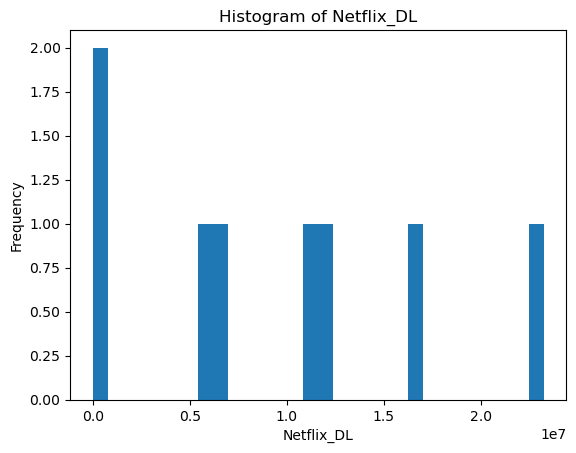

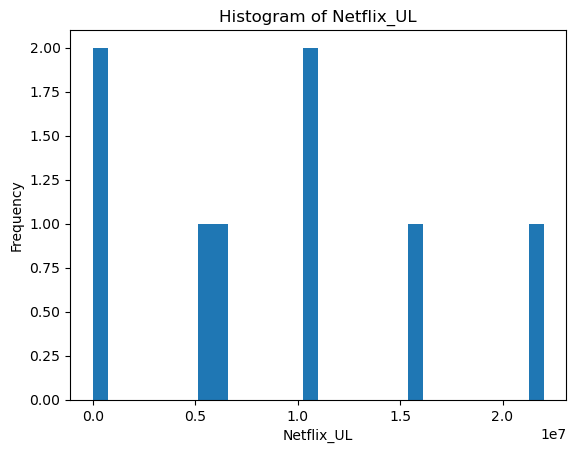

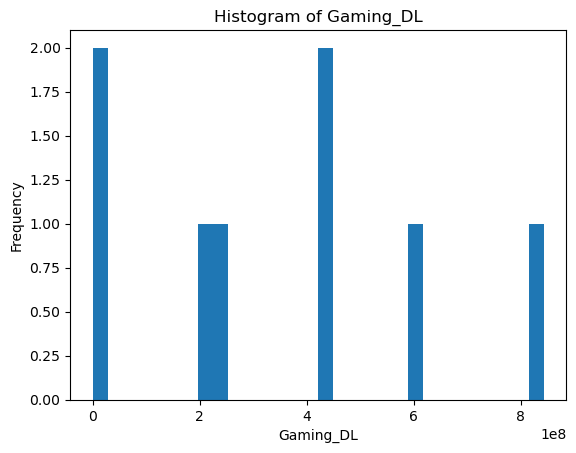

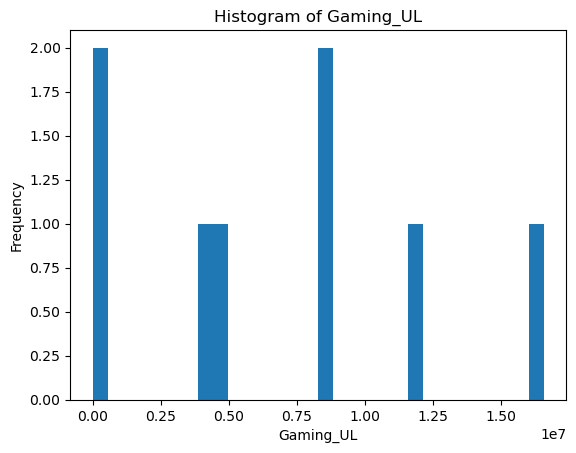

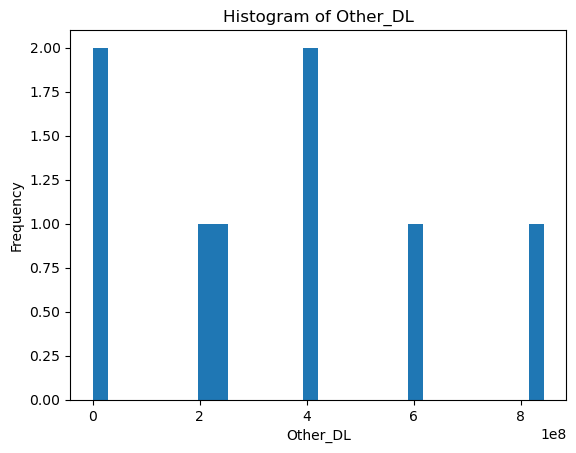

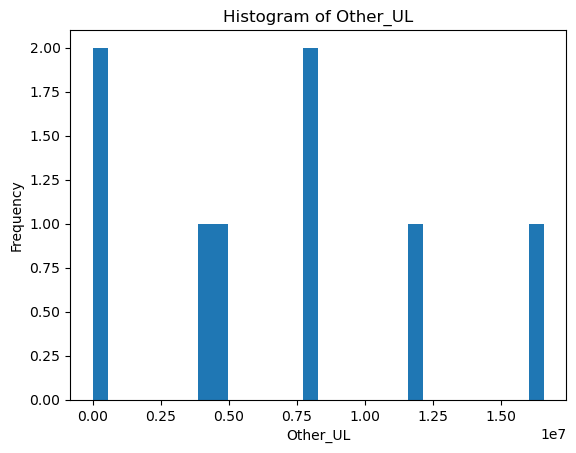

In [17]:
plot_variable_histograms(metrics)

## Bivariate Analysis Between Applications and UL + DL

In [18]:
relation = perform_bivariate_analysis(df_user_behavior)
display(relation)

Correlation between Gaming_DL and Total DL+UL data: 0.998061119510229
Correlation between YouTube_DL and Total DL+UL data: 0.02610151163432016
Correlation between Netflix_DL and Total DL+UL data: 0.02514044215116815
Correlation between YouTube_UL and Total DL+UL data: 0.02402271060071683
Correlation between Netflix_UL and Total DL+UL data: 0.02244093988535612
Correlation between Gaming_UL and Total DL+UL data: 0.019953679817722704
Correlation between Google_DL and Total DL+UL data: 0.013422405242898427
Correlation between Google_UL and Total DL+UL data: 0.005809087641961788
Correlation between Email_UL and Total DL+UL data: 0.00310024267739141
Correlation between Email_DL and Total DL+UL data: 0.003082723248029903
Correlation between SM_UL and Total DL+UL data: 0.0008435990316462071


None

## Total Data Per Decile

In [19]:
result = calculate_total_data_per_decile(df_user_behavior)
display(result)

,Decile_Class,Total_DL,Total_UL
0,5,4119505660147,374658675927
1,6,4860308948282,439048219416
2,7,4872529462585,438418058223
3,8,4857776218972,438509425513
4,9,4881271515511,439610834552


## Correlation Analysis on Social Media data, Google data, Email..

In [20]:
correlation_matrix = perform_correlation_analysis(df_user_behavior)
display(correlation_matrix)

,SM_DL,SM_UL,Google_DL,Google_UL,Email_DL,Email_UL,YouTube_DL,YouTube_UL,Netflix_DL,Netflix_UL,Gaming_DL,Gaming_UL,Other_DL,Other_UL
SM_DL,1,0,-0,0,0,-0,-0,-0,-0,0,0,0,0,0
SM_UL,0,1,0,0,0,-0,-0,-0,0,-0,0,0,-0,-0
Google_DL,-0,0,1,-0,0,0,0,0,0,-0,-0,-0,-0,-0
Google_UL,0,0,-0,1,0,-0,-0,-0,-0,-0,0,-0,0,-0
Email_DL,0,0,0,0,1,0,0,-0,-0,0,-0,-0,0,0
Email_UL,-0,-0,0,-0,0,1,0,-0,0,0,0,0,-0,-0
YouTube_DL,-0,-0,0,-0,0,0,1,0,0,0,-0,0,0,-0
YouTube_UL,-0,-0,0,-0,-0,-0,0,1,0,0,-0,-0,-0,-0
Netflix_DL,-0,0,0,-0,-0,0,0,0,1,-0,-0,0,-0,-0
Netflix_UL,0,-0,-0,-0,0,0,0,0,-0,1,-0,-0,-0,-0
